<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/22_Functinal_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

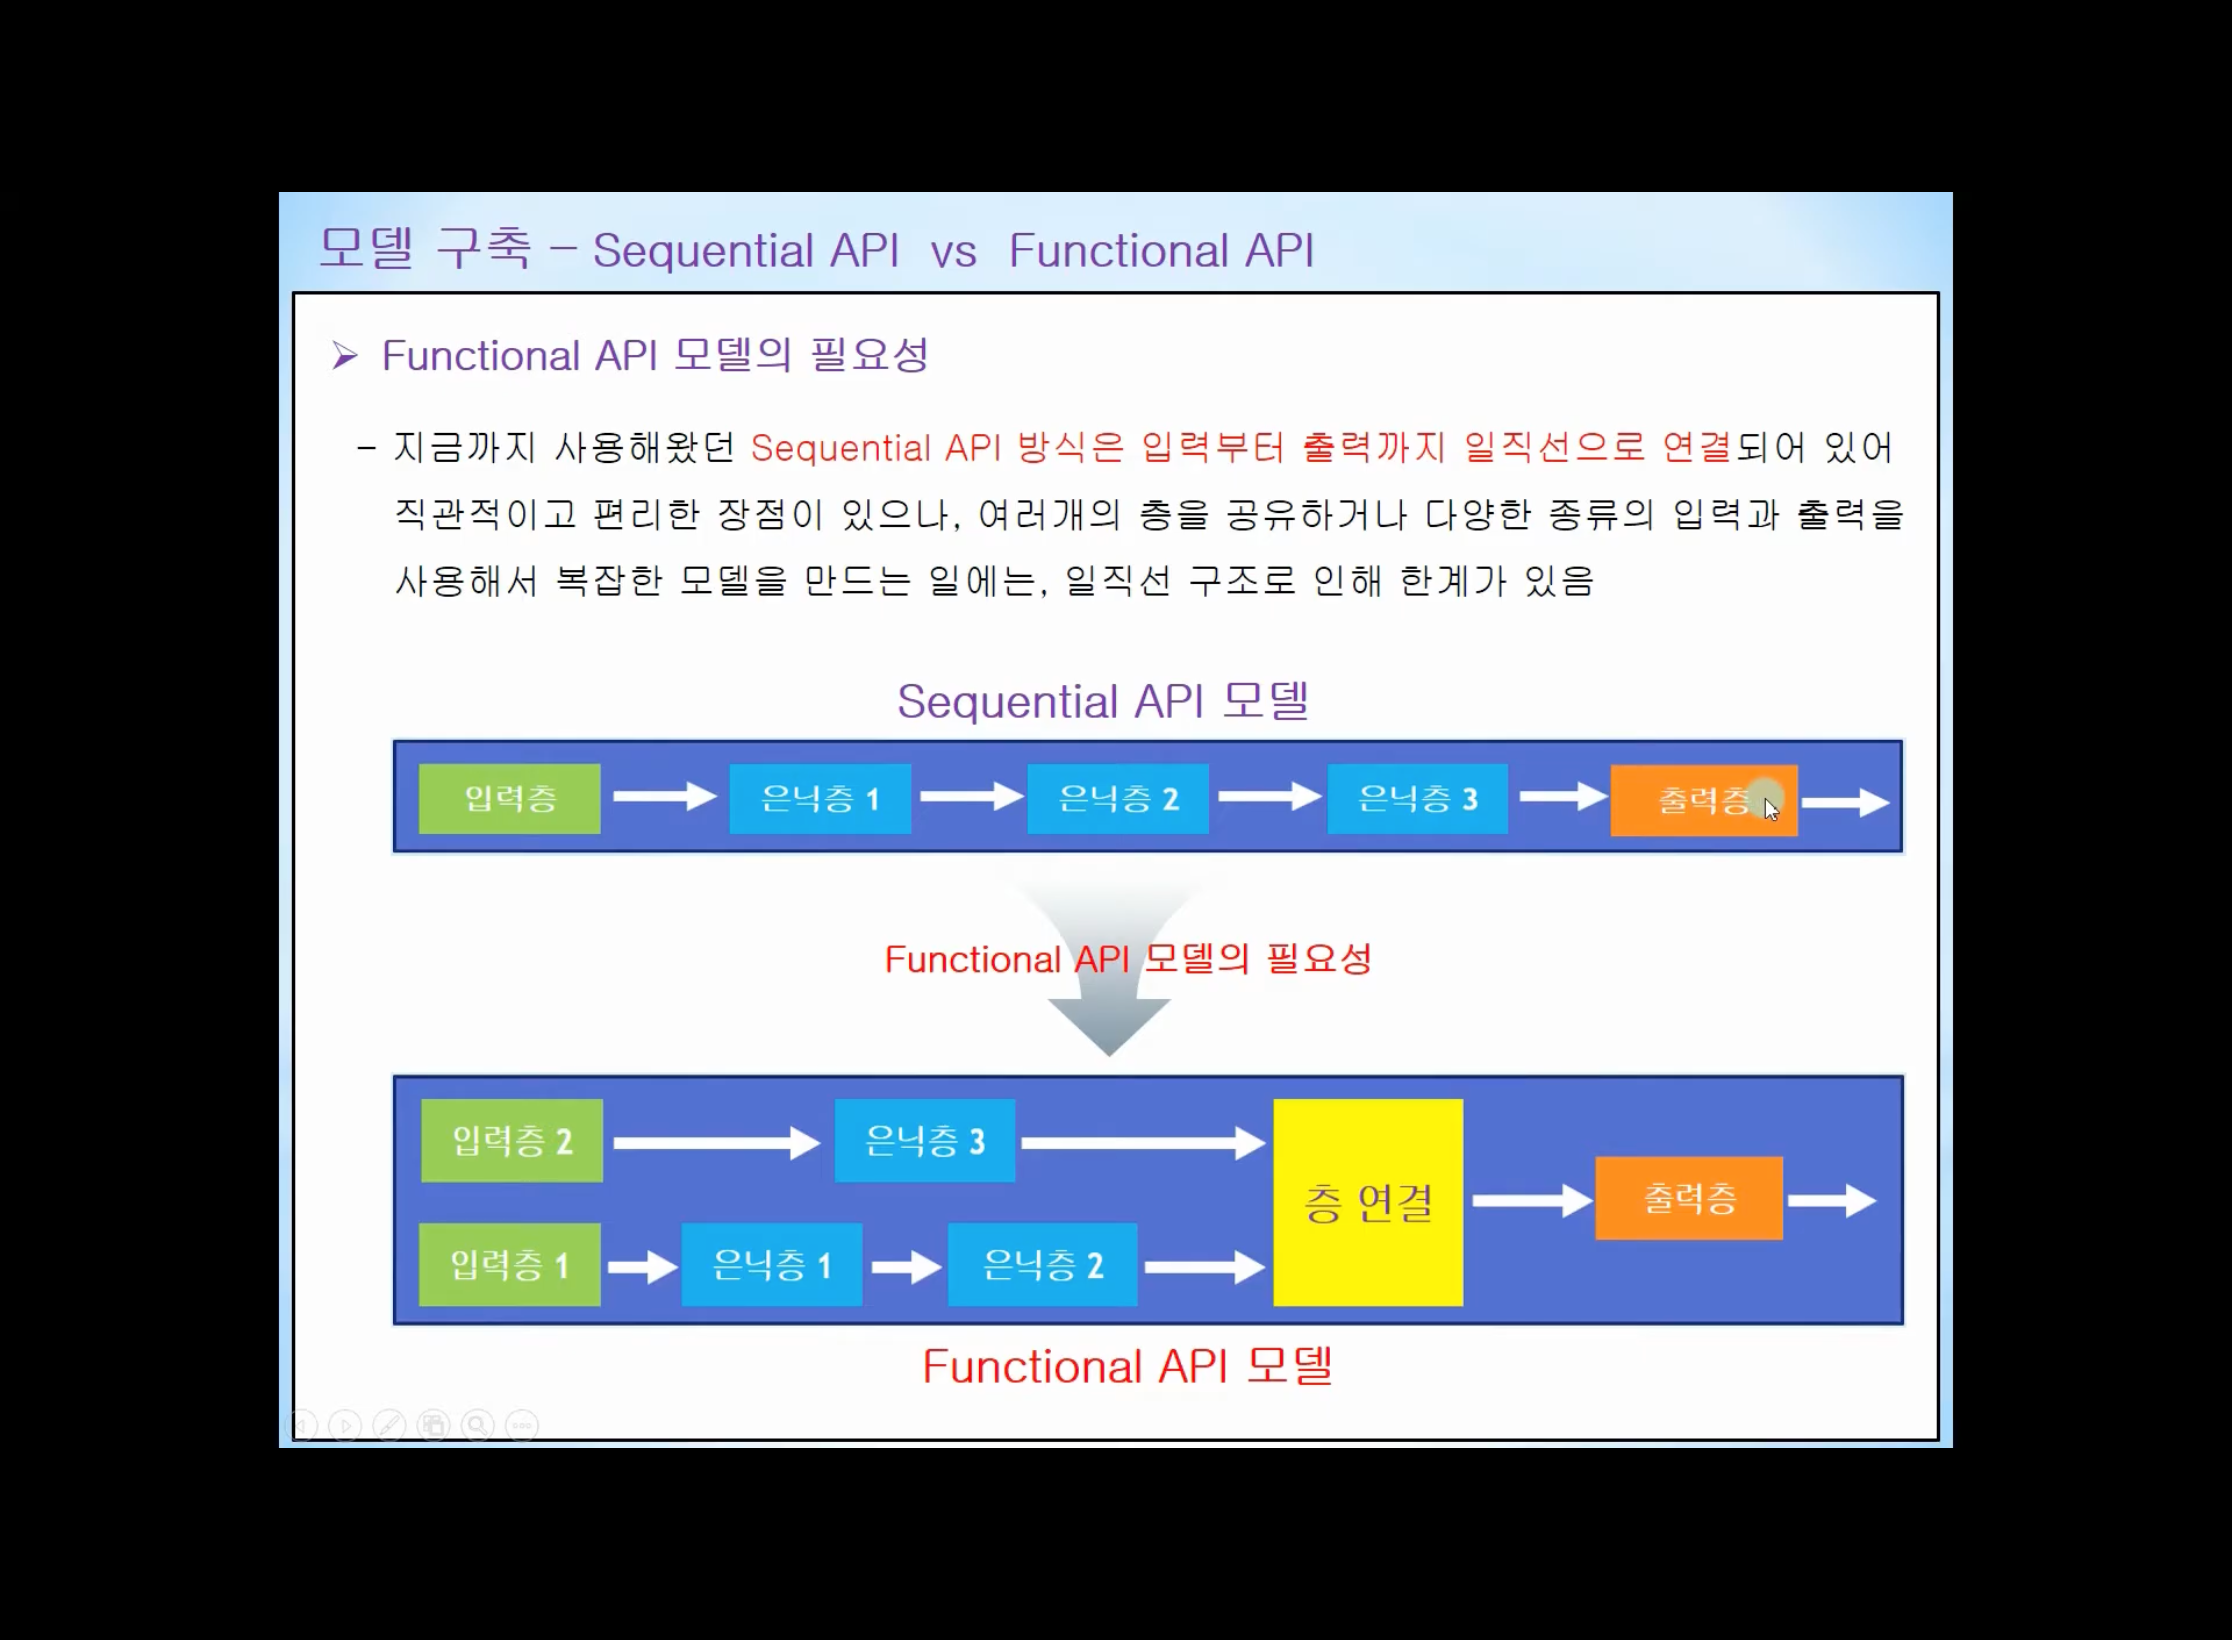

1. 입력 데이터의 shape을 tf.keras.layers.input()함수의 인자로 넣어 입력 층을 정의
2. 이전 층 출력 값을 다음 층 함수의 입력 값으로 사용 한 후에,
3. tf.keras.model() 함수에 입력과 출력을 넣어주어 모델 구축을 완성함


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,Input, concatenate
from tensorflow.keras.models import Model, Sequential


In [2]:
#Sequential API 모델
model=Sequential()

model.add(Dense(8,activation='relu',input_shape=(4,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


In [3]:
#Functinal API 모델
input_=Input(shape=(4,))

x=Dense(8,activation='relu')(input_)
x=Dense(16,activation='relu')(x)
x=Dense(32,activation='relu')(x)

output_=Dense(10,activation='softmax')(x)

model=Model(inputs=input_,outputs=output_)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


In [4]:
#입력층이 여러개의 functional API model
#입력층1에 대한 신경망
input_1=Input(shape=(4,))

hidden_1=Dense(8,activation='relu')(input_1)
hidden_2=Dense(16,activation='relu')(hidden_1)

output_1=Model(inputs=input_1,  outputs=hidden_2)

#입력층 2에대한 신경망
input_2=Input(shape=(8,))

hidden_3=Dense(8,activation='relu')(input_2)
output_2=Model(inputs=input_2,  outputs=hidden_3)

#층연결
result=concatenate([output_1.output,output_2.output])

#출력층 정의
output_=Dense(10,activation='softmax')(result)

#최종 모델 구축
model=Model(inputs=[output_1.output,output_2.output], outputs=output_)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 24)           0           ['input_4[0][0]',                
                                                                  'input_5[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 10)           250         ['concatenate[1][0]']      

In [5]:
#cnn모델을 functinal API로 설정하기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Conv2D,MaxPool2D
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [6]:
(x_train,t_train),(x_test,t_test)=mnist.load_data()

#텐서로 전환  
x_train,x_test=x_train.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1)

#정규화
x_train,x_test=x_train/255.,x_test/255.

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
input_=Input(shape=(28,28,1))

x=Conv2D(32,3,activation='relu')(input_)
x=Conv2D(64,3,activation='relu')(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)

x=Flatten()(x)

x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)

output_=Dense(10,activation='softmax')(x)

cnn=Model(inputs=input_,outputs=output_)

In [9]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

hist=cnn.fit(x_train,t_train,batch_size=128,epochs=30,validation_data=(x_test,t_test))

Epoch 1/30
469/469 [==============================] - 16s 10ms/step - loss: 0.2629 - accuracy: 0.9216 - val_loss: 0.0600 - val_accuracy: 0.9808
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0924 - accuracy: 0.9727 - val_loss: 0.0413 - val_accuracy: 0.9869
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0697 - accuracy: 0.9792 - val_loss: 0.0347 - val_accuracy: 0.9880
Epoch 4/30
469/469 [==============================] - 5s 10ms/step - loss: 0.0556 - accuracy: 0.9832 - val_loss: 0.0309 - val_accuracy: 0.9883
Epoch 5/30
469/469 [==============================] - 4s 10ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0284 - val_accuracy: 0.9905
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.0273 - val_accuracy: 0.9918
Ep

In [10]:
cnn.evaluate(x_test,t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9945


[0.03236399590969086, 0.9944999814033508]

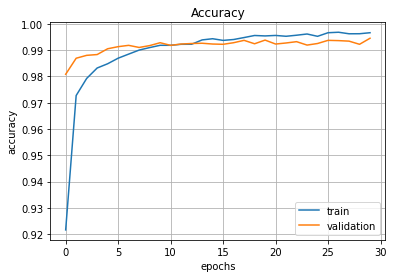

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

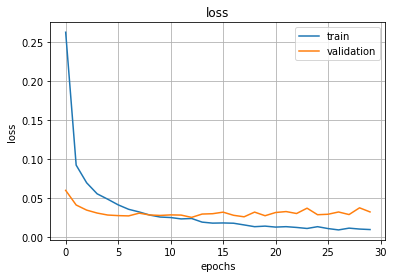

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()